In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

df = pd.read_csv(r'C:\Users\Sadyo\anaconda3\Flight price\airlines.csv')
df

,Unnamed: 0,airline,date,source,destination,price,d_t,a_t,t_t,stops
0,0,Air Asia,28/10/2021,New Delhi,Mumbai,"5,953",21:20,14:15\n+ 1 day,16h 55m,1 Stop
1,1,Go First,28/10/2021,New Delhi,Mumbai,"5,954",20:30,22:35,2h 05m,Non Stop
2,2,Go First,28/10/2021,New Delhi,Mumbai,"5,954",21:30,23:35,2h 05m,Non Stop
3,3,Go First,28/10/2021,New Delhi,Mumbai,"5,954",22:45,01:00\n+ 1 day,2h 15m,Non Stop
4,4,IndiGo,28/10/2021,New Delhi,Mumbai,"5,955",21:55,00:05\n+ 1 day,2h 10m,Non Stop
...,...,...,...,...,...,...,...,...,...,...
2406,60,IndiGo,09/01/2022,New Delhi,Kochi,"8,209",06:30,13:10,6h 40m,1 Stop
2407,61,IndiGo,09/01/2022,New Delhi,Kochi,"8,209",14:20,21:05,6h 45m,1 Stop
2408,62,IndiGo,09/01/2022,New Delhi,Kochi,"8,209",04:45,13:10,8h 25m,1 Stop
2409,63,Air India,09/01/2022,New Delhi,Kochi,"8,948",21:15,19:15\n+ 1 day,22h 00m,2 Stop(s)


In [3]:
df1 = df.rename(columns = {'airline': 'Airlines_name', 'date': 'Date_of_Journey','source':'flight_Source',
                          'destination':'flight_destination','price':'flight_price','d_t':'Dep_Time','a_t':'Arrival_Time',
                          't_t':'Flight_Duration','stops':'Total_Stops'}, inplace = False)

In [4]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#information about the data
df1.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411 entries, 0 to 2410
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airlines_name       2411 non-null   object
 1   Date_of_Journey     2411 non-null   object
 2   flight_Source       2411 non-null   object
 3   flight_destination  2411 non-null   object
 4   flight_price        2411 non-null   object
 5   Dep_Time            2411 non-null   object
 6   Arrival_Time        2411 non-null   object
 7   Flight_Duration     2411 non-null   object
 8   Total_Stops         2411 non-null   object
dtypes: object(9)
memory usage: 169.6+ KB


In [6]:
df1['flight_price']=[float(i.replace(',','')) for i in df1['flight_price']]

In [7]:
df1.shape

(2411, 9)

In [8]:
#finding the null values
df1.isnull().sum()

Airlines_name         0
Date_of_Journey       0
flight_Source         0
flight_destination    0
flight_price          0
Dep_Time              0
Arrival_Time          0
Flight_Duration       0
Total_Stops           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

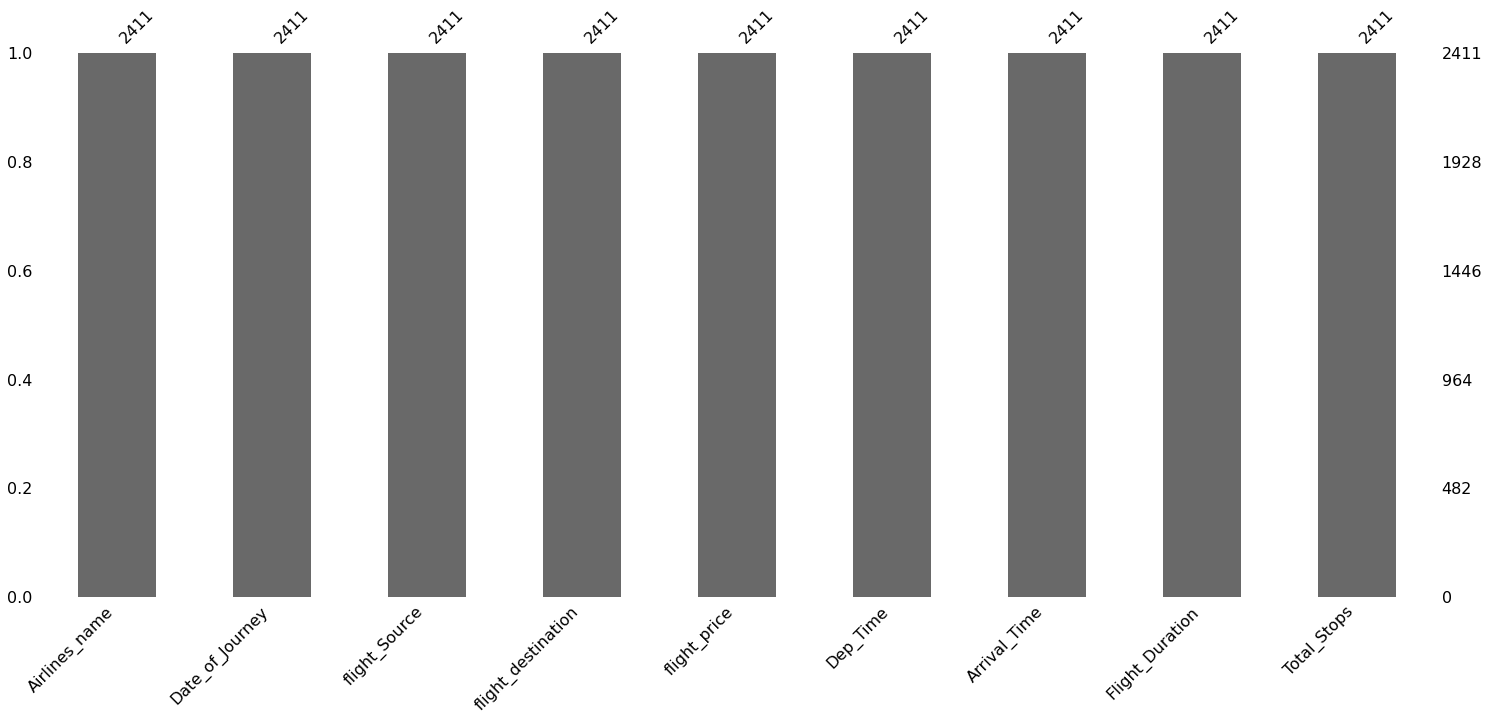

In [9]:
msno.bar(df1)
plt.show

In [10]:
df1.dtypes

Airlines_name          object
Date_of_Journey        object
flight_Source          object
flight_destination     object
flight_price          float64
Dep_Time               object
Arrival_Time           object
Flight_Duration        object
Total_Stops            object
dtype: object

Data Cleaning and pre processing

In [12]:
def split_hour(elm):
    return elm.split(' ')[0][:-1]

def split_minute(elm):
    return elm.split(' ')[1][:-1]

In [13]:
df1['Duration_hours']=df1['Flight_Duration'].apply(split_hour)
df1['Duration_minutes']=df1['Flight_Duration'].apply(split_minute)

In [14]:
def change_to_datetime(df1,col):
    df1[col]=pd.to_datetime(df1[col])

In [15]:
for col in ['Date_of_Journey','Dep_Time']:
    change_to_datetime(df1,col)

In [16]:
df1['journey_day']=df1['Date_of_Journey'].dt.day
df1['journey_month']=df1['Date_of_Journey'].dt.month
df1['journey_week']=df1['Date_of_Journey'].dt.dayofweek

In [19]:
df1['Arrival_Time']=[dt.strptime(i.split('\n')[0],'%H:%M').strftime('%H.%M') for i in df1['Arrival_Time']]

In [20]:
df1['Arrival_Time']=df1['Arrival_Time'].astype('float')

In [21]:
# Change data type and extract hour and minutes in arrival time

df1['Arrival_hour'] = pd.to_datetime(df1['Arrival_Time'],infer_datetime_format=True).dt.hour
df1['Arrival_minutes'] = pd.to_datetime(df1['Arrival_Time'],infer_datetime_format=True).dt.minute

# Drop 
df1.drop(['Arrival_Time'],axis=1,inplace=True)

In [22]:
# Change data type and extract hour and minutes in depature time

df1['Dep_hour'] = pd.to_datetime(df1['Dep_Time'],infer_datetime_format=True).dt.hour
df1['Dep_minutes'] = pd.to_datetime(df1['Dep_Time'],infer_datetime_format=True).dt.minute

# Drop Dep_Time
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [23]:
df1['Journey_day']=df1['Date_of_Journey'].dt.day
df1['Journey_month']=df1['Date_of_Journey'].dt.month

In [24]:
df1.drop('Date_of_Journey',axis=1,inplace=True)

In [25]:
df1.dtypes

Airlines_name          object
flight_Source          object
flight_destination     object
flight_price          float64
Flight_Duration        object
Total_Stops            object
Duration_hours         object
Duration_minutes       object
journey_day             int64
journey_month           int64
journey_week            int64
Arrival_hour            int64
Arrival_minutes         int64
Dep_hour                int64
Dep_minutes             int64
Journey_day             int64
Journey_month           int64
dtype: object

In [27]:
df1['Duration_hours']=df1['Duration_hours'].astype('float')
df1['Duration_minutes']=df1['Duration_minutes'].astype('float')

In [29]:
df1['Flight_Duration']=df1['Flight_Duration'].astype('float')

In [28]:
df1['Flight_Duration']=[i.replace('h ','.').replace('m','') for i in df1['Flight_Duration']]

In [30]:
df1['Total_Stops']=[int(i.split()[0].replace('Non','0')) for i in df1['Total_Stops']]

In [31]:
df1.dtypes

Airlines_name          object
flight_Source          object
flight_destination     object
flight_price          float64
Flight_Duration       float64
Total_Stops             int64
Duration_hours        float64
Duration_minutes      float64
journey_day             int64
journey_month           int64
journey_week            int64
Arrival_hour            int64
Arrival_minutes         int64
Dep_hour                int64
Dep_minutes             int64
Journey_day             int64
Journey_month           int64
dtype: object

In [37]:
df1.drop(['journey_day','journey_month','journey_week'], axis = 1)

,Airlines_name,flight_Source,flight_destination,flight_price,Flight_Duration,Total_Stops,Duration_hours,Duration_minutes,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Journey_day,Journey_month
0,Air Asia,New Delhi,Mumbai,5953.0,16.55,1,16.0,55.0,0,0,21,20,28,10
1,Go First,New Delhi,Mumbai,5954.0,2.05,0,2.0,5.0,0,0,20,30,28,10
2,Go First,New Delhi,Mumbai,5954.0,2.05,0,2.0,5.0,0,0,21,30,28,10
3,Go First,New Delhi,Mumbai,5954.0,2.15,0,2.0,15.0,0,0,22,45,28,10
4,IndiGo,New Delhi,Mumbai,5955.0,2.10,0,2.0,10.0,0,0,21,55,28,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,IndiGo,New Delhi,Kochi,8209.0,6.40,1,6.0,40.0,0,0,6,30,1,9
2407,IndiGo,New Delhi,Kochi,8209.0,6.45,1,6.0,45.0,0,0,14,20,1,9
2408,IndiGo,New Delhi,Kochi,8209.0,8.25,1,8.0,25.0,0,0,4,45,1,9
2409,Air India,New Delhi,Kochi,8948.0,22.00,2,22.0,0.0,0,0,21,15,1,9


In [38]:
min={}
for i in df1['flight_destination'].unique():
    df_temp=df1.loc[df1['flight_destination']==i]
    min[i]=list(df_temp['Journey_day'])[0]

In [39]:
min

{'Mumbai': 28, 'Kochi': 12, 'Chennai': 12}

Separating Categorical features

In [43]:
cat_col=[col for col in df1.columns if df1[col].dtype=='O']
cont_col=[col for col in df1.columns if df1[col].dtype!='O']

In [44]:
print(cat_col)
print(cont_col)

['Airlines_name', 'flight_Source', 'flight_destination']
['flight_price', 'Flight_Duration', 'Total_Stops', 'Duration_hours', 'Duration_minutes', 'journey_day', 'journey_month', 'journey_week', 'Arrival_hour', 'Arrival_minutes', 'Dep_hour', 'Dep_minutes', 'Journey_day', 'Journey_month']


In [45]:
cat_df = df1[cat_col]
cont_df = df1[cont_col]

In [47]:
cat_df.head()

,Airlines_name,flight_Source,flight_destination
0,Air Asia,New Delhi,Mumbai
1,Go First,New Delhi,Mumbai
2,Go First,New Delhi,Mumbai
3,Go First,New Delhi,Mumbai
4,IndiGo,New Delhi,Mumbai


Handling categorical features

In [48]:
cat_df['Airlines_name'].value_counts()

IndiGo       806
Air India    693
Go First     448
Air Asia     295
Vistara      133
SpiceJet      36
Name: Airlines_name, dtype: int64

In [49]:
len(cat_df['Airlines_name'].unique())

6

In [50]:
cat_df['flight_Source'].value_counts()

New Delhi    2411
Name: flight_Source, dtype: int64

In [51]:
cat_df['flight_destination'].value_counts()

Kochi      2064
Mumbai      282
Chennai      65
Name: flight_destination, dtype: int64

In [52]:
cont_df['Total_Stops'].unique()

array([1, 0, 2, 3], dtype=int64)

Plots:
    Categorical Features

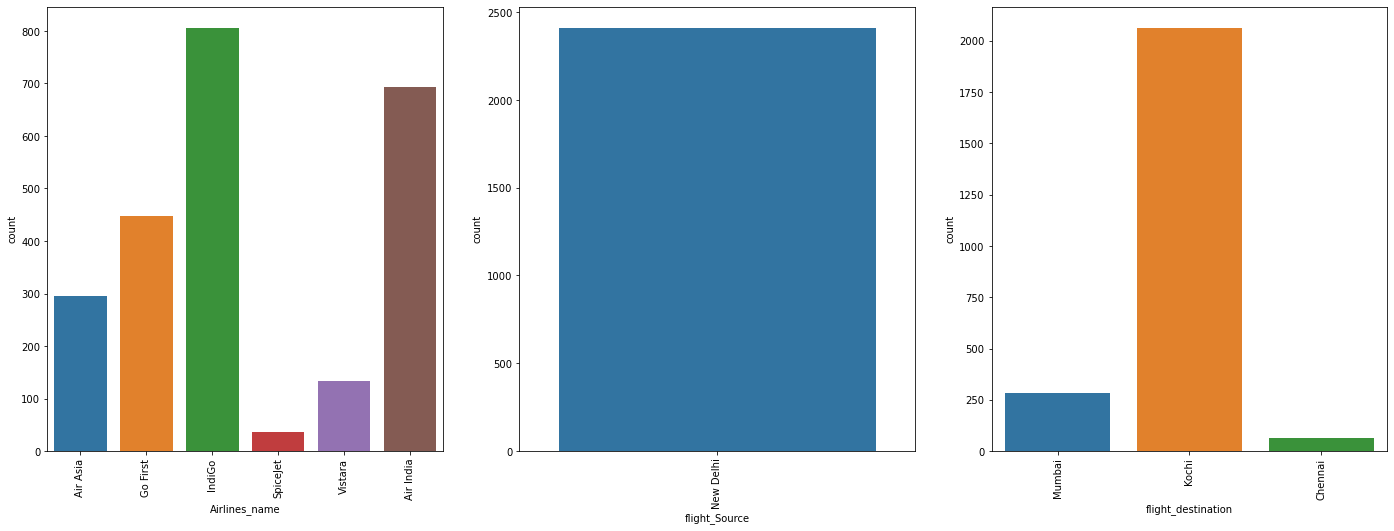

In [53]:
c=1
plt.figure(figsize=(20,45))

for i in cat_df.columns:
    plt.subplot(6,3,c)
    sns.countplot(cat_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

Numerical Features

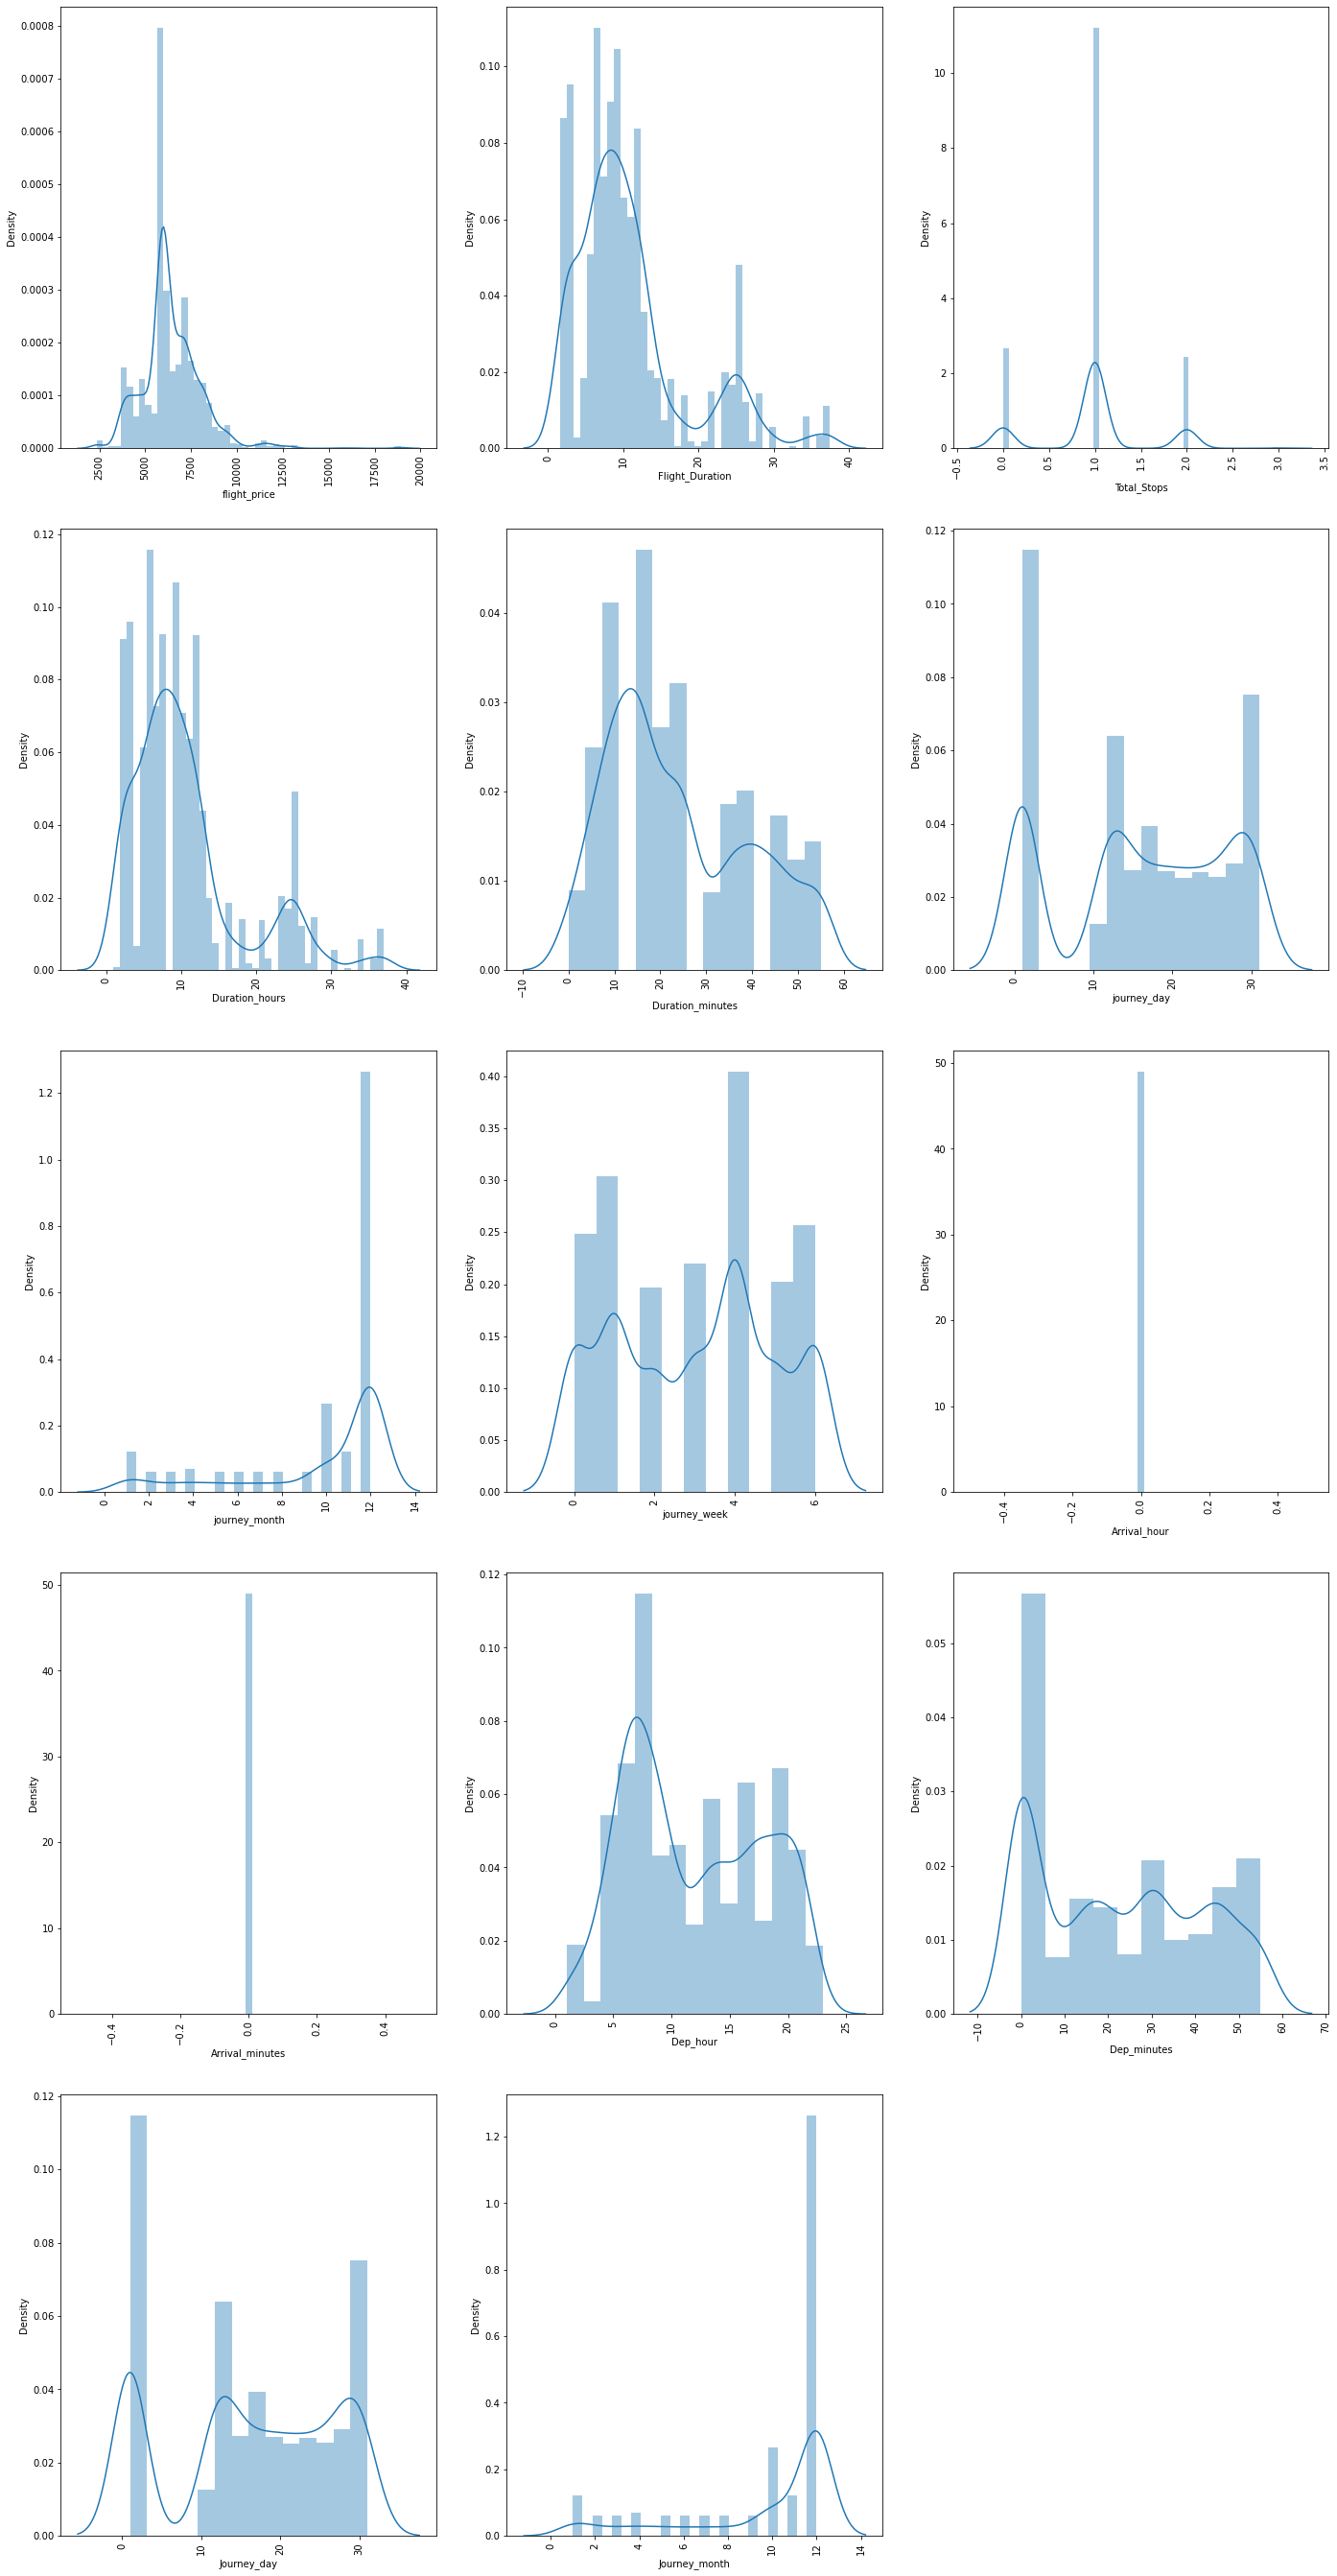

In [54]:
c=1
plt.figure(figsize=(20,45))

for i in cont_df.columns:
    plt.subplot(6,3,c)
    sns.distplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

Categorical features Vs price

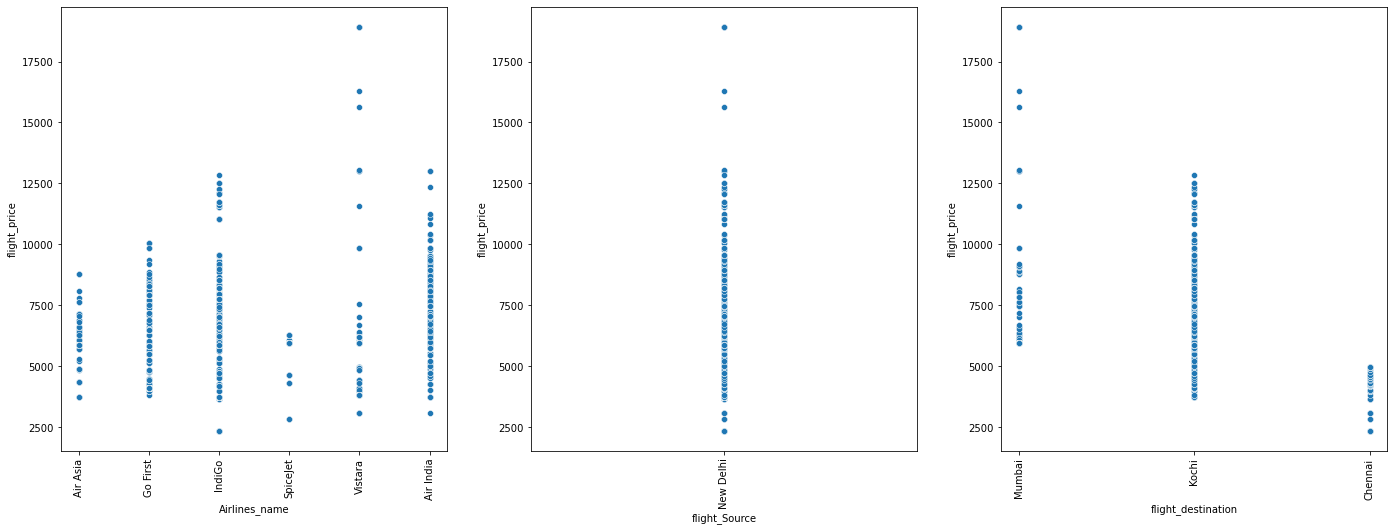

In [55]:
c=1
plt.figure(figsize=(20,45))

for i in cat_df.columns:
    plt.subplot(6,3,c)
    sns.scatterplot(x=cat_df[i],y=cont_df.flight_price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

Numerical features Vs price

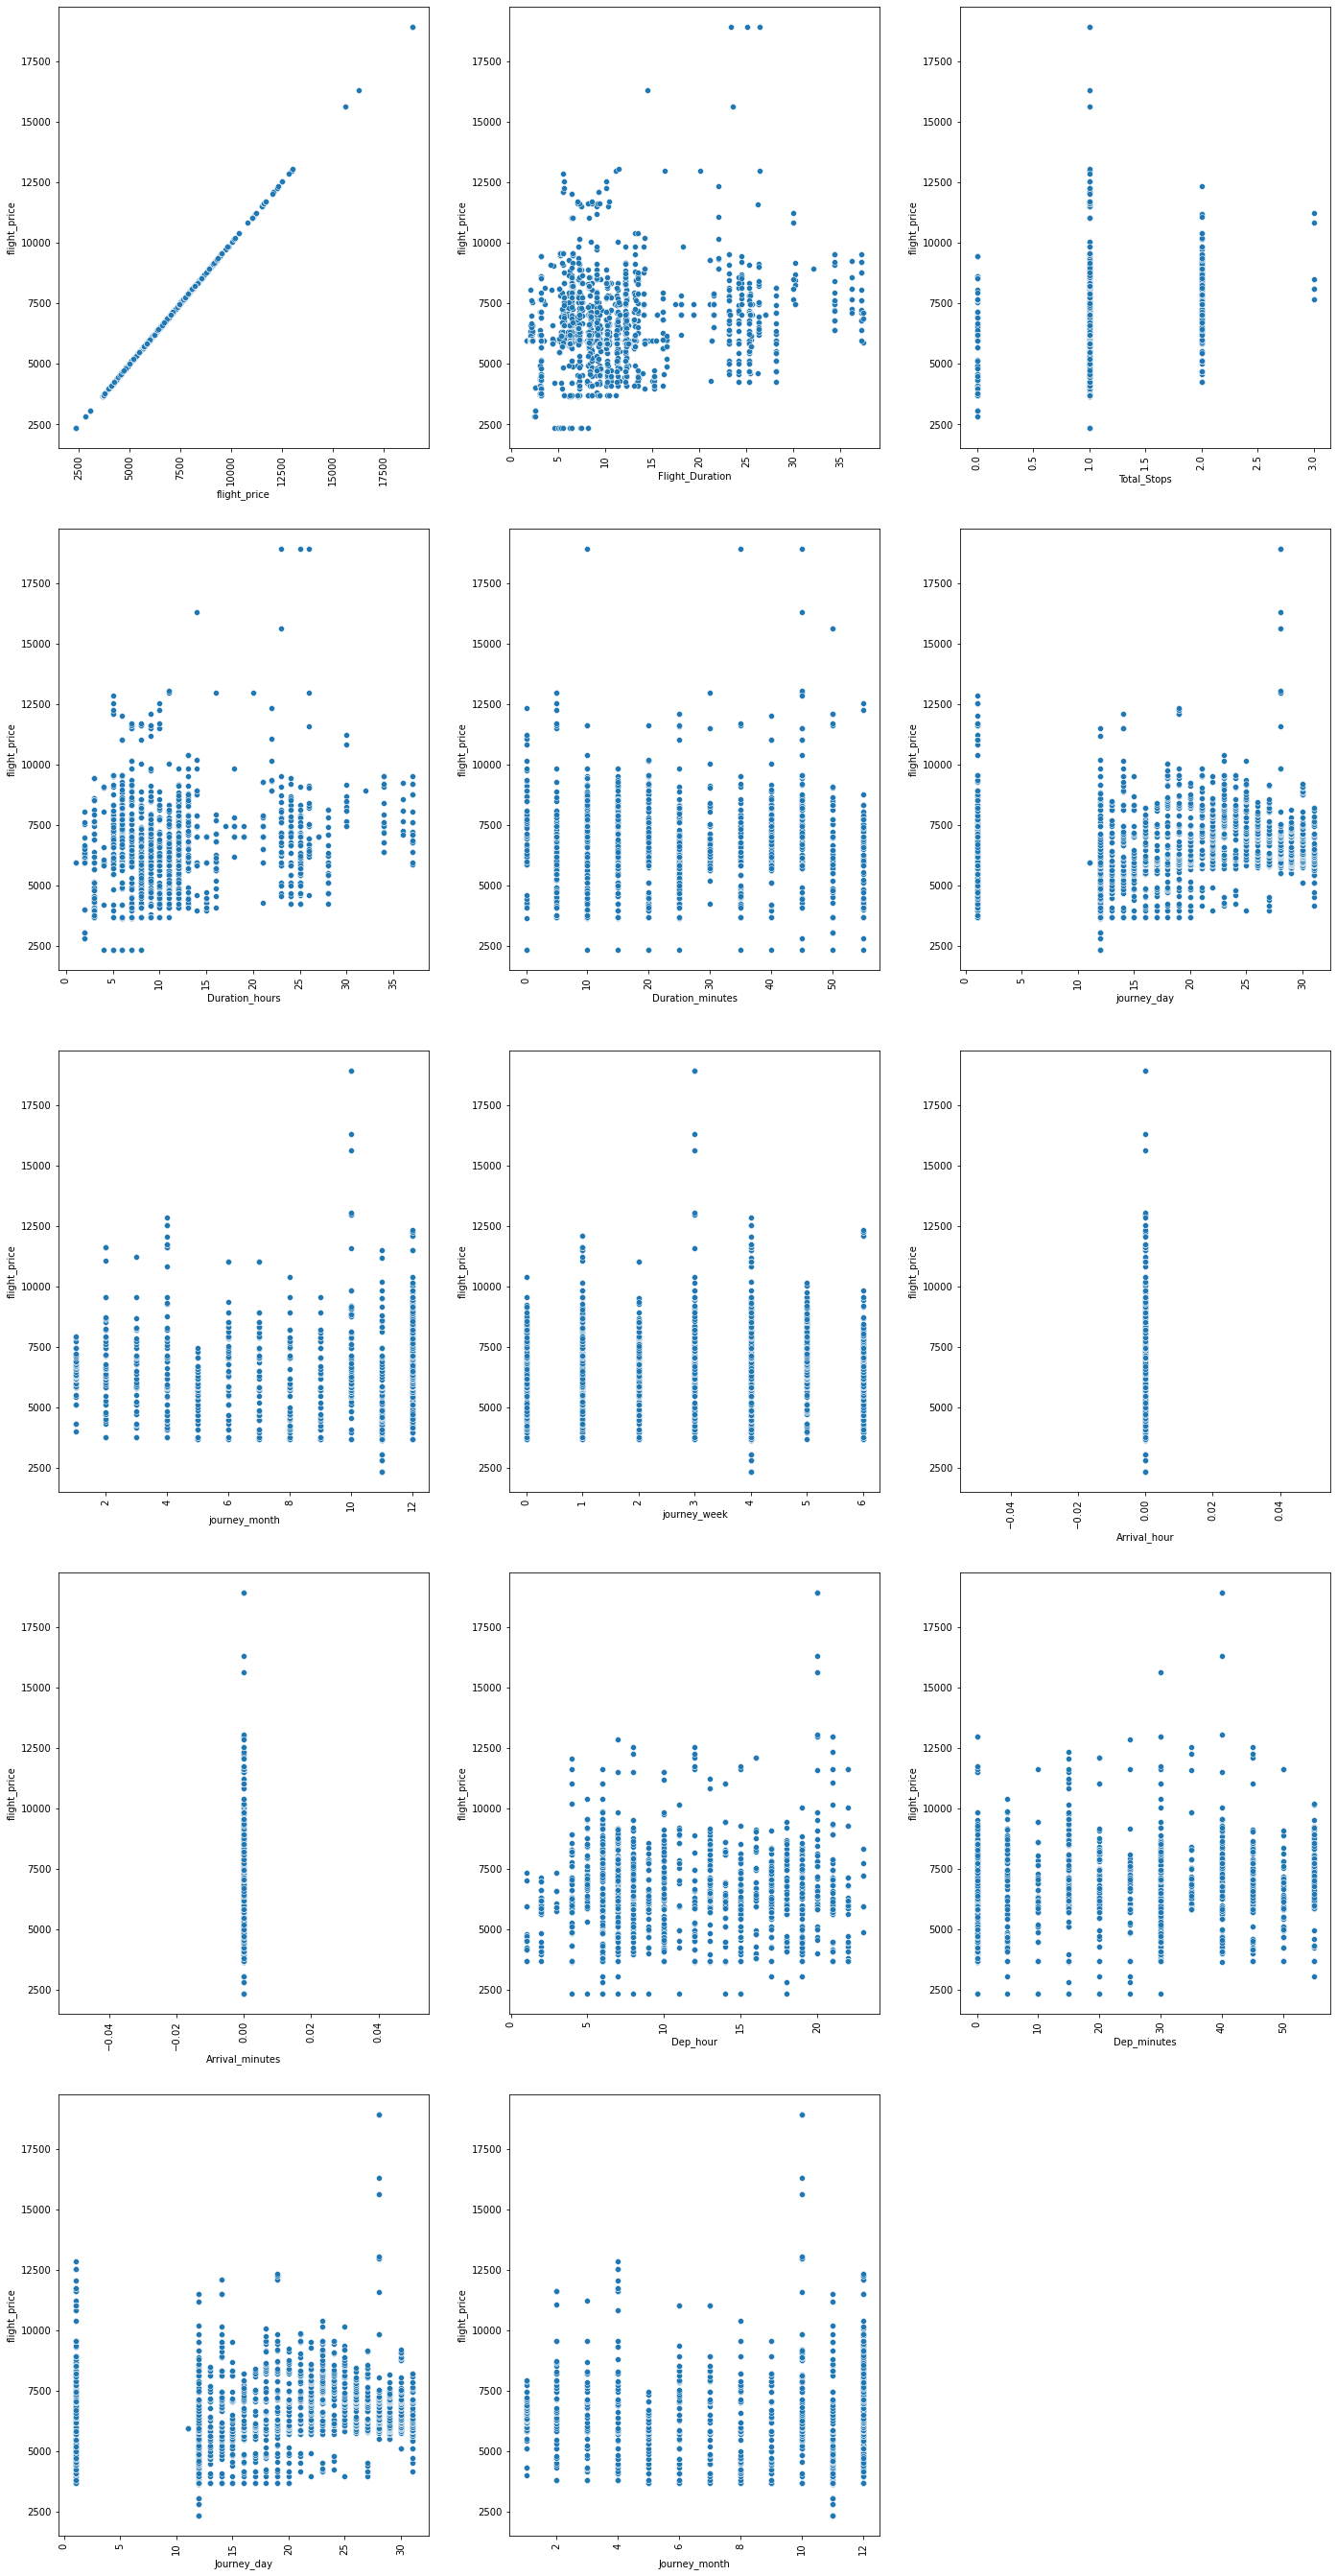

In [56]:
c=1
plt.figure(figsize=(20,45))

for i in cont_df.columns:
    plt.subplot(6,3,c)
    sns.scatterplot(x=cont_df[i],y=cont_df.flight_price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

Handling Outliers

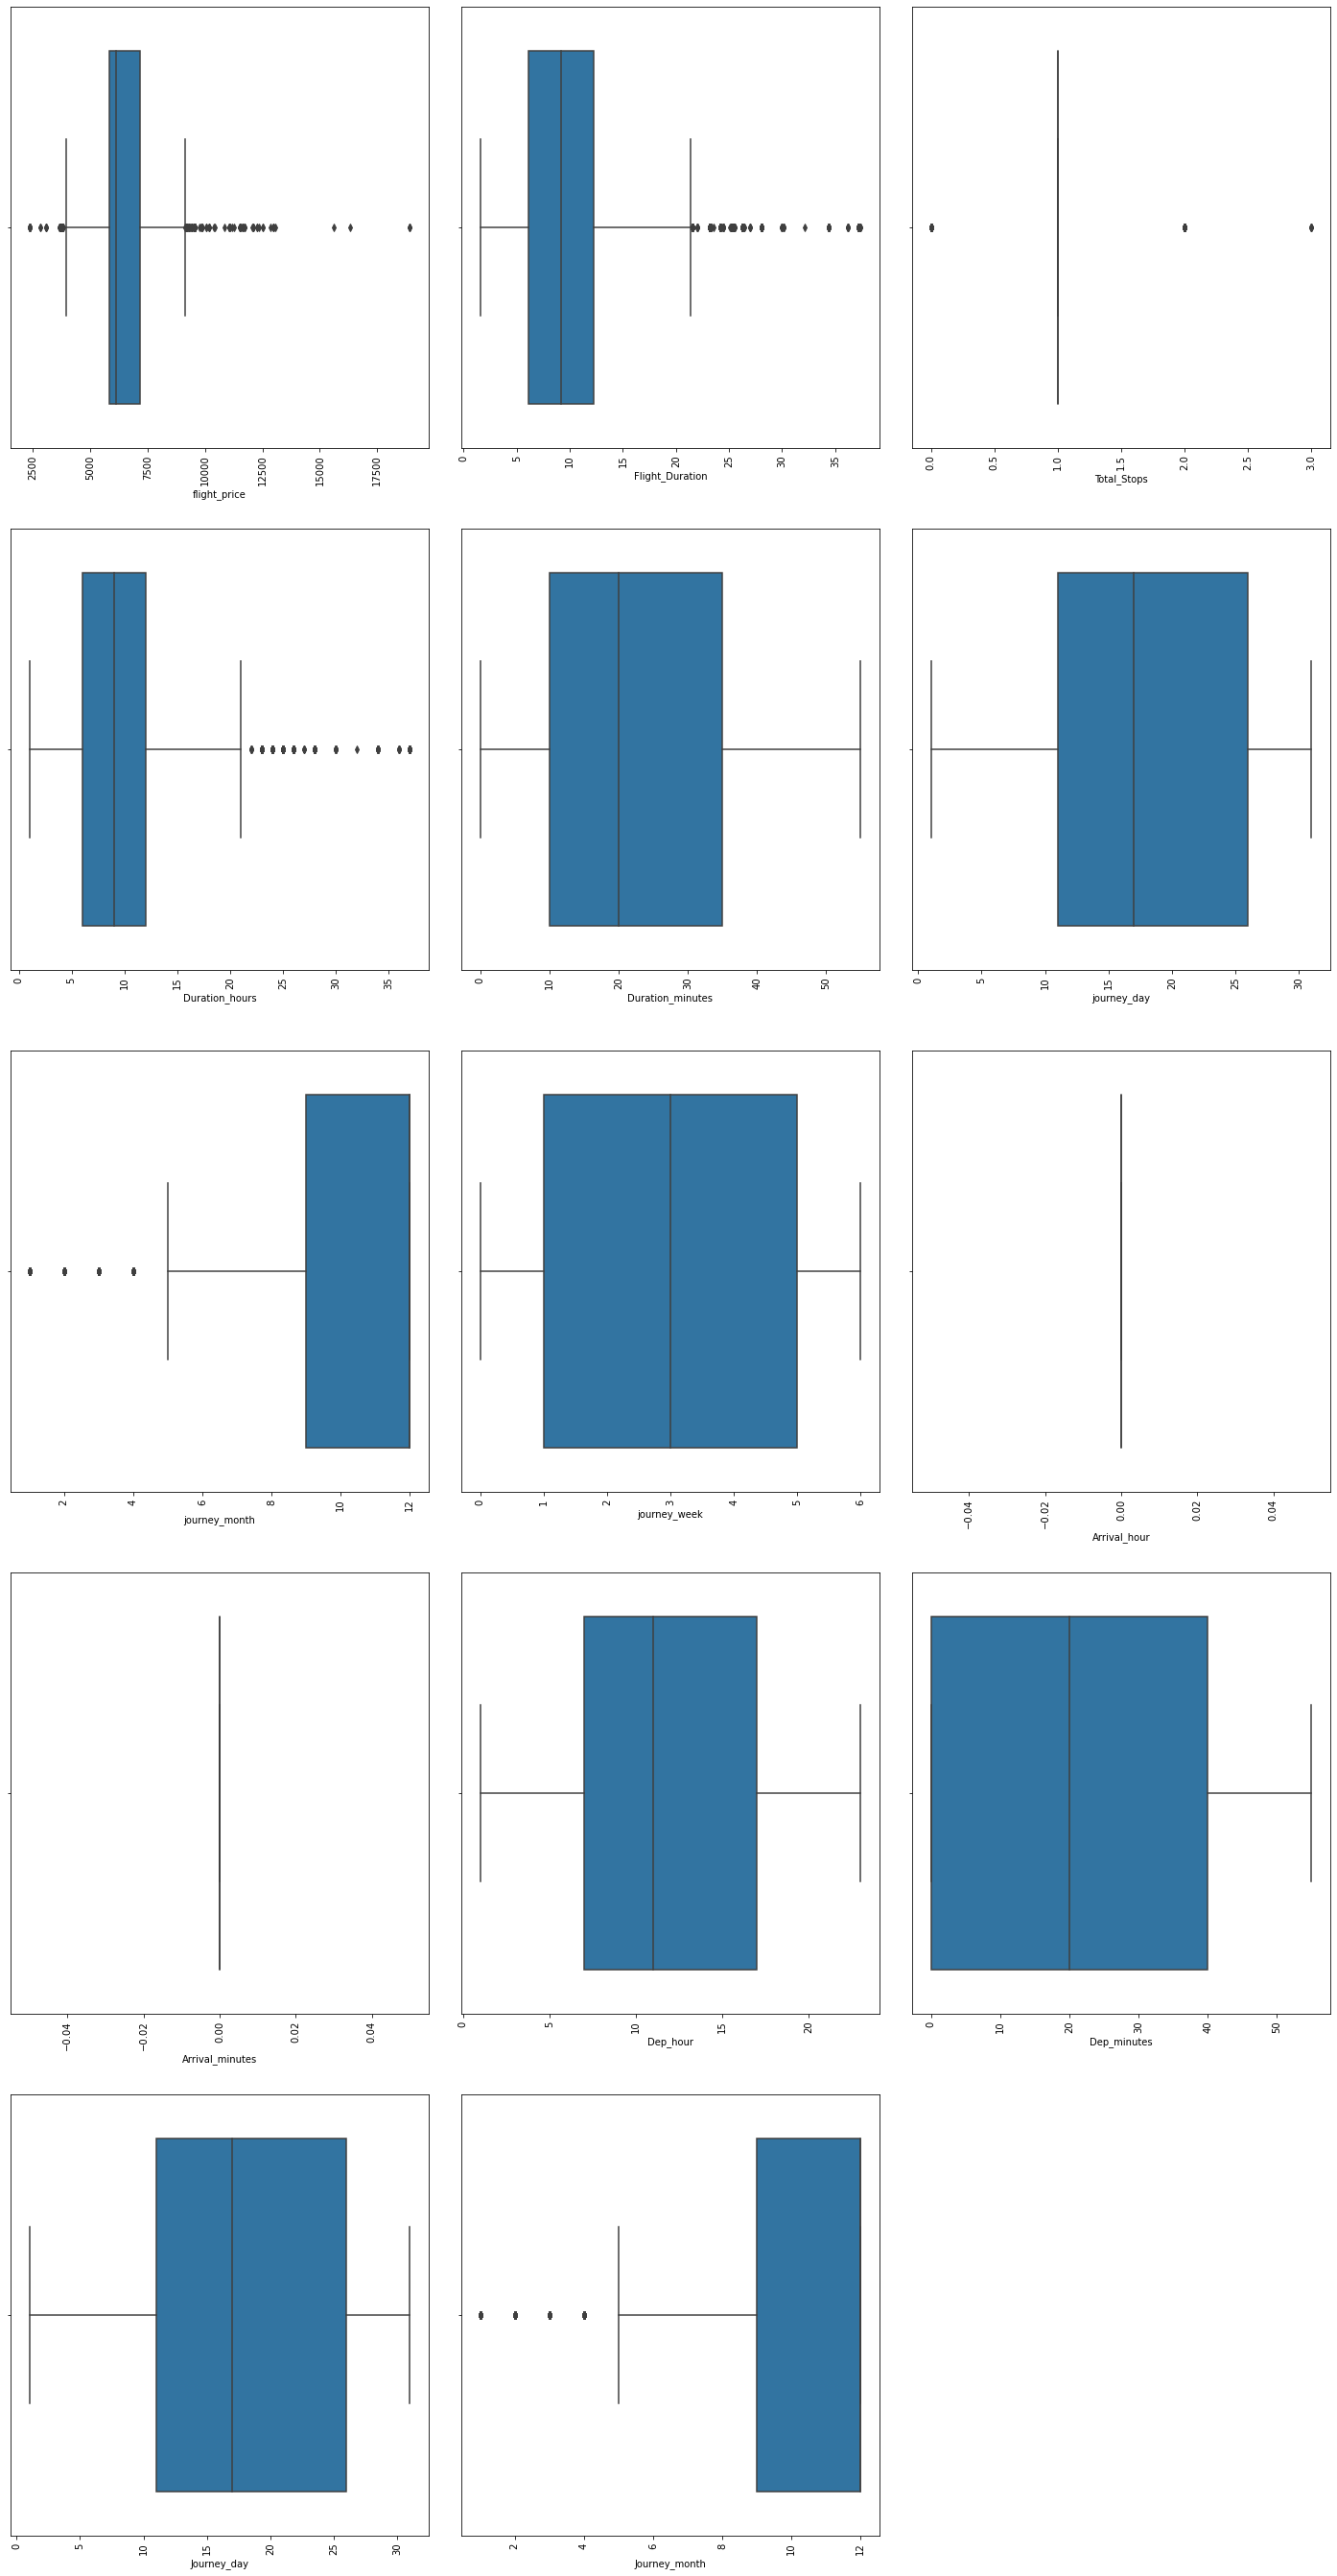

In [57]:
#outlier detection
c=1
plt.figure(figsize=(20,45))

for i in cont_df.columns:
    plt.subplot(6,3,c)
    sns.boxplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

In [58]:
#treating skewness
cont_df.skew()

flight_price        1.297605
Flight_Duration     1.396923
Total_Stops         0.080138
Duration_hours      1.407618
Duration_minutes    0.521185
journey_day        -0.210072
journey_month      -1.393023
journey_week       -0.050806
Arrival_hour        0.000000
Arrival_minutes     0.000000
Dep_hour            0.187140
Dep_minutes         0.198807
Journey_day        -0.210072
Journey_month      -1.393023
dtype: float64

In [67]:
count_df.Duration_hours.median()

9.0

In [65]:
count_df = cont_df.drop('Flight_Duration', axis = 1)

In [66]:
count_df.skew()

flight_price        1.297605
Total_Stops         0.080138
Duration_hours      1.407618
Duration_minutes    0.521185
journey_day        -0.210072
journey_month      -1.393023
journey_week       -0.050806
Arrival_hour        0.000000
Arrival_minutes     0.000000
Dep_hour            0.187140
Dep_minutes         0.198807
Journey_day        -0.210072
Journey_month      -1.393023
dtype: float64

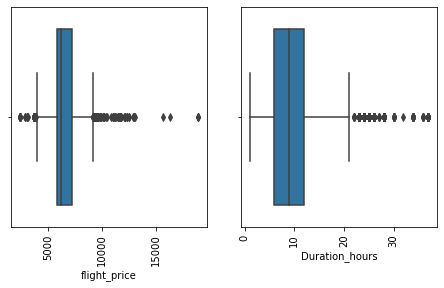

In [61]:
c=1
plt.figure(figsize=(10,25))

for i in ['flight_price','Duration_hours']:
    plt.subplot(6,3,c)
    sns.boxplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

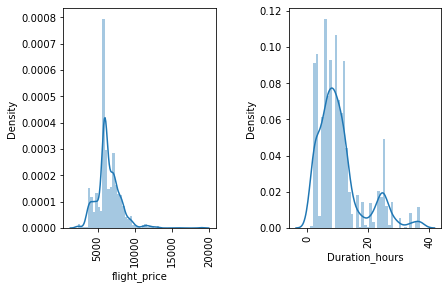

In [68]:
c=1
plt.figure(figsize=(10,25))

for i in ['flight_price','Duration_hours']:
    plt.subplot(6,3,c)
    sns.distplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

In [69]:
cont_df.Duration_hours=np.log(cont_df.Duration_hours)

In [70]:
for i,v in enumerate(cont_df.Duration_hours):
    if v==float('-inf'):
        cont_df.Duration_hours[i]=0

In [71]:
cont_df.Duration_hours.skew()

-0.2437138445767945

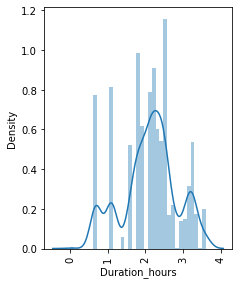

In [72]:
c=1
plt.figure(figsize=(10,25))

for i in ['Duration_hours']:
    plt.subplot(6,3,c)
    sns.distplot(cont_df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

Encoding Categorical Data

In [73]:
cat_df.columns

Index(['Airlines_name', 'flight_Source', 'flight_destination'], dtype='object')

In [75]:
#Encoding Nominal data with OneHotEncoder
airline = pd.get_dummies(cat_df['Airlines_name'],drop_first=True)

In [76]:
cat_df.drop(['Airlines_name'],axis=1,inplace=True)

In [79]:
cat_df=pd.concat([airline,cat_df],axis=1)

In [80]:
pd.options.display.max_columns=None

In [81]:
cat_df.head()

,Air India,Go First,IndiGo,SpiceJet,Vistara,flight_Source,flight_destination
0,0,0,0,0,0,New Delhi,Mumbai
1,0,1,0,0,0,New Delhi,Mumbai
2,0,1,0,0,0,New Delhi,Mumbai
3,0,1,0,0,0,New Delhi,Mumbai
4,0,0,1,0,0,New Delhi,Mumbai


In [82]:
#Encoding Ordinal data with labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for c in ['flight_Source','flight_destination']:
    if cat_df[c].dtypes=='object':
        cat_df[c]=le.fit_transform(cat_df[c])

In [83]:
cat_df.head()

,Air India,Go First,IndiGo,SpiceJet,Vistara,flight_Source,flight_destination
0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,2
2,0,1,0,0,0,0,2
3,0,1,0,0,0,0,2
4,0,0,1,0,0,0,2


Final data

In [84]:
data = pd.concat([cat_df,cont_df],axis=1)

In [85]:
# almost 80% of outliers' lies under 40000
data['flight_price']=np.where(data['flight_price']>=40000,data['flight_price'].median(),data['flight_price'])

In [86]:
data.head()

,Air India,Go First,IndiGo,SpiceJet,Vistara,flight_Source,flight_destination,flight_price,Flight_Duration,Total_Stops,Duration_hours,Duration_minutes,journey_day,journey_month,journey_week,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Journey_day,Journey_month
0,0,0,0,0,0,0,2,5953.0,16.55,1,2.772589,55.0,28,10,3,0,0,21,20,28,10
1,0,1,0,0,0,0,2,5954.0,2.05,0,0.693147,5.0,28,10,3,0,0,20,30,28,10
2,0,1,0,0,0,0,2,5954.0,2.05,0,0.693147,5.0,28,10,3,0,0,21,30,28,10
3,0,1,0,0,0,0,2,5954.0,2.15,0,0.693147,15.0,28,10,3,0,0,22,45,28,10
4,0,0,1,0,0,0,2,5955.0,2.10,0,0.693147,10.0,28,10,3,0,0,21,55,28,10


In [87]:
data.shape

(2411, 21)

In [88]:
data.to_excel('Preprocessed_data.xlsx',engine='openpyxl')

Splitting Data into Input and Target

In [91]:
x=data.drop('flight_price',axis=1)
y=np.array(data.flight_price)

Splitting Data into Traning Set and Test Set

In [92]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [93]:
print("size: \nx_train: {} ,y_train: {} \nx_test: {} ,y_test: {}".format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

size: 
x_train: (1808, 20) ,y_train: (1808,) 
x_test: (603, 20) ,y_test: (603,)


Scaling the data

In [94]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x_train.iloc[:,11:])
y_train=y_train.reshape(len(y_train),1)
y_train_scaled=sc_y.fit_transform(y_train)
x_tscaled=sc_x.transform(x_test.iloc[:,11:])

In [95]:
print("size: \nx_scaled: {} ,y_train_scaled: {} \nx_tscaled: {} ,y_test: {}".format(x_scaled.shape,y_train_scaled.shape,x_tscaled.shape,y_test.shape))

size: 
x_scaled: (1808, 9) ,y_train_scaled: (1808, 1) 
x_tscaled: (603, 9) ,y_test: (603,)


In [96]:
x_train_scaled=np.concatenate((x_train.iloc[:,:11],x_scaled),axis=1)
x_test_scaled=np.concatenate((x_test.iloc[:,:11],x_tscaled),axis=1)

In [97]:
x_train_scaled.shape

(1808, 20)

In [98]:
train_data=pd.DataFrame(x_train_scaled,columns=x.columns)
train_data.head()

,Air India,Go First,IndiGo,SpiceJet,Vistara,flight_Source,flight_destination,Flight_Duration,Total_Stops,Duration_hours,Duration_minutes,journey_day,journey_month,journey_week,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Journey_day,Journey_month
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.10,0.0,1.098612,10.0,0.380090,0.673320,-1.513321,0.0,0.0,0.707693,-1.220833,0.380090,0.673320
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,25.45,1.0,3.218876,45.0,-1.430343,-1.026116,-0.504068,0.0,0.0,1.572110,-0.416924,-1.430343,-1.026116
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9.05,1.0,2.197225,5.0,-0.382198,0.106841,-1.008695,0.0,0.0,0.016160,-1.220833,-0.382198,0.106841
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.45,1.0,1.791759,45.0,-0.382198,0.390081,0.505185,0.0,0.0,0.361927,-0.148954,-0.382198,0.390081
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.20,1.0,2.397895,20.0,0.284804,0.673320,1.514438,0.0,0.0,-0.502490,0.654954,0.284804,0.673320


Model Selection

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lr=LinearRegression()
svr=SVR()
knr=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

In [100]:
def predict(reg):
    for r in reg:
        r.fit(x_train_scaled,y_train_scaled)
        print('Training Score for model {} is {}'.format(r,r.score(x_train_scaled,y_train_scaled)))
        y_pred=sc_y.inverse_transform(r.predict(x_test_scaled))
        print('r2_score: {}'.format(r2_score(y_test,y_pred)))
        print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_pred)))
        print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))
        #sns.distplot(y_test-y_pred)
        plt.show()
        print('-------------------------------------------')

In [101]:
predict([lr,svr,knr,dt,abr,rf,gbr])

Training Score for model LinearRegression() is 0.22055250291125517
r2_score: 0.21389937094969713
Mean Absolute Error: 948.3595417801417
Mean Squared Error: 1725722.0778531039
-------------------------------------------
Training Score for model SVR() is 0.19031083822101114
r2_score: 0.1970348879746744
Mean Absolute Error: 914.7776804689073
Mean Squared Error: 1762744.577932686
-------------------------------------------
Training Score for model KNeighborsRegressor() is 0.588874854806782
r2_score: 0.4654281362890259
Mean Absolute Error: 708.7001658374793
Mean Squared Error: 1173542.4617578774
-------------------------------------------
Training Score for model DecisionTreeRegressor() is 0.9998157362559051
r2_score: 0.312210141069007
Mean Absolute Error: 614.2114427860696
Mean Squared Error: 1509901.0236318407
-------------------------------------------
Training Score for model AdaBoostRegressor() is 0.33404172341307714
r2_score: 0.10855797285991209
Mean Absolute Error: 1096.2812756951832

Cross - Validation

In [102]:
from sklearn.model_selection import cross_val_score

RandomForestRegressor

In [103]:
print(rf)
for i in range(5,11):
    accuracy=cross_val_score(rf,x_train_scaled,y_train_scaled,cv=i)
    print('Accuracy: {}'.format(accuracy.mean()))

RandomForestRegressor()
Accuracy: 0.7071802536992016
Accuracy: 0.7180625223915476
Accuracy: 0.718041989965222
Accuracy: 0.7214417797892766
Accuracy: 0.717653046908737
Accuracy: 0.7210550815851511


GradientBoostingRegressor

In [104]:
print(gbr)
for i in range(5,11):
    accuracy=cross_val_score(gbr,x_train_scaled,y_train_scaled,cv=i)
    print('Accuracy: {}'.format(accuracy.mean()))

GradientBoostingRegressor()
Accuracy: 0.5616609562220007
Accuracy: 0.568584542710945
Accuracy: 0.5628392612928069
Accuracy: 0.5599754720098566
Accuracy: 0.5644920439552176
Accuracy: 0.5593395296476398


Grid Search

In [105]:
from sklearn.model_selection import GridSearchCV

RandomForestRegressor

In [106]:
param_grid={'n_estimators':[50,70,100,120,150,200],'max_depth':[None,2,4,5,10],'min_samples_split':[2, 5, 10]}

In [107]:
gs_rf=GridSearchCV(rf,param_grid,cv=5)
gs_rf.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]})

In [108]:
gs_rf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [109]:
gs_rf.best_score_

0.7140914371557383

GradientBoostingRegressor

In [110]:
param_grid={'learning_rate':[0.1,0.05,0.01],'n_estimators':[50,70,100,120,150],'min_samples_split':[2,4,5],
           'max_depth':[3,4,5,7,10]}

In [111]:
gs_gbr=GridSearchCV(gbr,param_grid,cv=5)
gs_gbr.fit(x_train_scaled,y_train_scaled)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5, 7, 10],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 70, 100, 120, 150]})

In [112]:
gs_gbr.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_split': 4,
 'n_estimators': 150}

In [113]:
gs_gbr.best_score_

0.7114811604242701

Creating and Saving model instance with best parameters

In [114]:
import joblib

In [115]:
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=7,min_samples_split=4,n_estimators=100)

In [116]:
model.fit(x_train_scaled,y_train_scaled)

GradientBoostingRegressor(max_depth=7, min_samples_split=4)

In [117]:
joblib.dump(model,'fare_prices_pred.obj')

['fare_prices_pred.obj']

Testing the model

In [118]:
final_model=joblib.load('fare_prices_pred.obj')

In [119]:
y_pred=sc_y.inverse_transform(final_model.predict(x_test_scaled))

In [120]:
r2_score(y_test,y_pred)

0.6517242076907797

In [121]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,6027.0,6284.017684
1,7052.0,6599.589782
2,7205.0,7326.850828
3,9204.0,8792.925696
4,6062.0,6304.434977
...,...,...
598,5954.0,6057.028000
599,7488.0,7575.883344
600,5954.0,6142.360317
601,6494.0,6692.262051
